<a href="https://colab.research.google.com/github/Rabbia-Ijaz/TryItOut/blob/main/MotionTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
from google.colab import drive
drive.mount('/content/drive')
import glob
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
from IPython.display import display
!pip install UVTextureConverter
from UVTextureConverter import UVConverter
from UVTextureConverter import Normal2Atlas
from UVTextureConverter import Atlas2Normal

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read a new frame:  0
Read a new frame:  1
Read a new frame:  2
Read a new frame:  3
Read a new frame:  4
Read a new frame:  5
Read a new frame:  6
Read a new frame:  7
Read a new frame:  8
Read a new frame:  9
Read a new frame:  10
['frame0.jpg', 'frame1.jpg', 'frame2.jpg', 'frame3.jpg', 'frame4.jpg', 'frame5.jpg', 'frame6.jpg', 'frame7.jpg', 'frame8.jpg', 'frame9.jpg', 'frame10.jpg']
input_4_IUV.png input_2_IUV.png
input_4_IUV.png input_3_IUV.png
input_4_IUV.png input_4_IUV.png
input_4_IUV.png input_5_IUV.png
input_4_IUV.png input_6_IUV.png
input_4_IUV.png input_7_IUV.png
input_4_IUV.png input_8_IUV.png
input_4_IUV.png input_9_IUV.png
input_4_IUV.png input_10_IUV.png
['Output2.jpg', 'Output3.jpg', 'Output4.jpg', 'Output5.jpg', 'Output6.jpg', 'Output7.jpg', 'Output8.jpg', 'Output9.jpg', 'Output10.jpg']


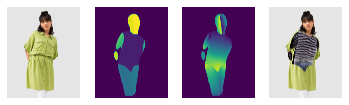

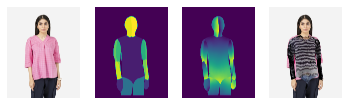

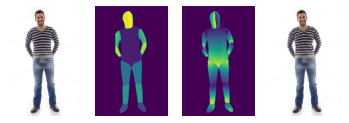

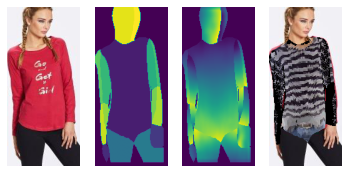

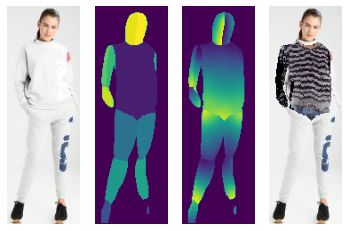

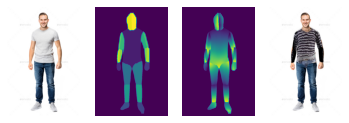

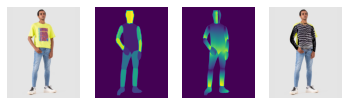

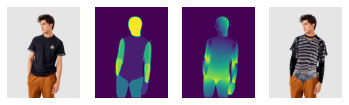

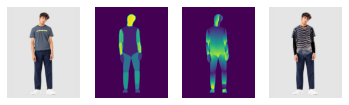

In [39]:
def Display(title1 ,a): #global display func
    name=title1+'.jpg'
    cv2.imwrite(name,a)
    print(title1)
    display(Image(filename=name))

input=""
input_IUV=""
target=""

def Inputfunc(input_1,target_1):
  
  input_1_IUV=input_1[0:-4]+"_IUV.png"  
  target_IUV=target_1[0:-4]+"_IUV.png"
  print(input_1_IUV,target_IUV)
  path="/content/drive/MyDrive/Colab Notebooks/"
  input=path+input_1
  input_IUV=path+input_1_IUV
  target=path+target_1
  model_image = Image.open(path+input_1)
  dense_image = Image.open(path+input_1_IUV)
  model_image_1 = Image.open(path+target_1)
  dense_image_1 = Image.open(path+target_IUV)
  return input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1


def MotionTransfer(Input,Target):

  vidcap = cv2.VideoCapture(Target)
  InputImageArray=[]
  OutputImageArray=[]
  success,image = vidcap.read()
  count = 0
  while success:
    filetemp="frame"+str(count)+".jpg"
    cv2.imwrite(filetemp, image)     # save frame as JPEG file      
    vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*1200))    # added this line
    success,image = vidcap.read()
    InputImageArray.append(filetemp)
    print('Read a new frame: ', count)
    #plt.imshow(image)
    count += 1
  print(InputImageArray)


  for iter in range (2,len(InputImageArray)):
    tempfilename="input_"+str(iter)+".jpg"
    input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc(Input,tempfilename)

    ##**Source Image**
    dense_array = np.asarray(dense_image)
    model_dense=np.zeros(shape=(3,dense_array[:,:,0].shape[0],dense_array[:,:,0].shape[1]))
    model_dense[0]=dense_array[:,:,2]
    model_dense[1]=dense_array[:,:,1]
    model_dense[2]=dense_array[:,:,0]
    model_dense.shape
    model_array = np.asarray(model_image)[:model_dense.shape[1],:model_dense.shape[2],:]

    # figure, axes = plt.subplots(nrows=1, ncols=4)
    # axes.ravel()[0].imshow(model_array)
    # axes.ravel()[0].set_axis_off()
    # axes.ravel()[1].imshow(model_dense[0])
    # axes.ravel()[1].set_axis_off()
    # axes.ravel()[2].imshow(model_dense[1])
    # axes.ravel()[2].set_axis_off()
    # axes.ravel()[3].imshow(model_dense[2])
    # axes.ravel()[3].set_axis_off()

    ##**Target Image**
    dense_array_1 = np.asarray(dense_image_1)
    model_dense_1=np.zeros(shape=(3,dense_array_1[:,:,0].shape[0],dense_array_1[:,:,0].shape[1]))
    model_dense_1[0]=dense_array_1[:,:,2]
    model_dense_1[1]=dense_array_1[:,:,1]
    model_dense_1[2]=dense_array_1[:,:,0]
    model_dense_1.shape
    model_array_1 = np.asarray(model_image_1)[:model_dense_1.shape[1],:model_dense_1.shape[2],:]

    figure, axes = plt.subplots(nrows=1, ncols=4)
    axes.ravel()[0].imshow(model_array_1)
    axes.ravel()[0].set_axis_off()
    axes.ravel()[1].imshow(model_dense_1[0])
    axes.ravel()[1].set_axis_off()
    axes.ravel()[2].imshow(model_dense_1[1])
    axes.ravel()[2].set_axis_off()
    axes.ravel()[3].imshow(model_dense_1[2])
    axes.ravel()[3].set_axis_off()


    solution = 75
    solution_float = float(solution) - 1


    ##**Texture Extraction from Source Image**
    U = model_dense[1, :, :]
    V = model_dense[2, :, :]
    parts = list()
    for PartInd in range(1, 25):
        actual_part = np.zeros((solution, solution, 3))
        x, y = np.where(model_dense[0,:,:] == PartInd)
        if len(x) == 0:
            parts.append(actual_part)
            continue
        u_current_points = U[x, y]
        v_current_points = V[x, y]


        tex_map_coords = ((255-v_current_points)*solution_float/255.).astype(int), (u_current_points*solution_float/255.).astype(int)
        for c in range(3):
            actual_part[tex_map_coords[0], tex_map_coords[1], c] = model_array[x, y, c]

        parts.append(actual_part)


    tex_trans, mask_trans = UVConverter.create_texture(input, input_IUV, parts_size=solution, concat=False)

    # for display
    TextureIm = UVConverter.concat_atlas_tex(tex_trans)  # 800 x 1200 x 3
    plt.imshow(TextureIm)

    model_image_identity = model_array * np.expand_dims((model_dense[0] == 2)+(model_dense[0] == 15)+(model_dense[0] == 16)+(model_dense[0] == 17)+(model_dense[0] == 18)+(model_dense[0] == 19)+(model_dense[0] == 20)+ (model_dense[0] == 21)+(model_dense[0] == 22), 2)
    #plt.imshow(model_image_identity)

    np.array(parts).shape

    IUV = model_dense

    I=model_dense[0,:,:]
    U = model_dense[1,:,:]
    V = model_dense[2,:,:]

    R_im = np.zeros(U.shape)
    G_im = np.zeros(U.shape)
    B_im = np.zeros(U.shape)

    for PartInd in range(1, 25):
        tex = np.array(parts)[PartInd - 1, :, :, :].squeeze()
        R = tex[:,:,0]
        G = tex[:,:,1]
        B = tex[:,:,2]
        ###############
        x,y = np.where(IUV[0,:,:]==PartInd)
        u_current_points = U[x,y]   #  Pixels that belong to this specific part.
        v_current_points = V[x,y]
        ##
        r_current_points = R[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
        g_current_points = G[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
        b_current_points = B[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
        ##  Get the RGB values from the texture images.
        R_im[IUV[0,:,:]==PartInd] = r_current_points
        G_im[IUV[0,:,:]==PartInd] = g_current_points
        B_im[IUV[0,:,:]==PartInd] = b_current_points
    generated_image = np.concatenate((R_im[:,:,np.newaxis],G_im[:,:,np.newaxis],B_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)
    #generated_image.shape
    #plt.imshow(np.uint8(generated_image)*255)


    ##**Image Synthesis**
    IUV = model_dense_1
    U = model_dense_1[1,:,:]
    V = model_dense_1[2,:,:]

    R_im = np.zeros(U.shape)
    G_im = np.zeros(U.shape)
    B_im = np.zeros(U.shape)

    for PartInd in range(1, 25):
        tex = np.array(parts)[PartInd - 1, :, :, :].squeeze()
        R = tex[:,:,0]
        G = tex[:,:,1]
        B = tex[:,:,2]
        ###############
        x,y = np.where(IUV[0,:,:]==PartInd)
        u_current_points = U[x,y]   #  Pixels that belong to this specific part.
        v_current_points = V[x,y]
        ##
        r_current_points = R[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
        g_current_points = G[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
        b_current_points = B[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
        ##  Get the RGB values from the texture images.
        R_im[IUV[0,:,:]==PartInd] = r_current_points
        G_im[IUV[0,:,:]==PartInd] = g_current_points
        B_im[IUV[0,:,:]==PartInd] = b_current_points
    generated_image_1 = np.concatenate((R_im[:,:,np.newaxis],G_im[:,:,np.newaxis],B_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)

    plt.imshow(np.uint8(generated_image_1) * 255)


    ##**Extraction of the Important Part**
    apparel_matrix = np.expand_dims((model_dense_1[0] == 2)+(model_dense_1[0] == 15)+(model_dense_1[0] == 16)+(model_dense_1[0] == 17)+(model_dense_1[0] == 18)+(model_dense_1[0] == 19)+(model_dense_1[0] == 20)+ (model_dense_1[0] == 21)+(model_dense_1[0] == 22), 2)

    apparel = generated_image_1 * apparel_matrix * 255
    plt.imshow(apparel)

    model_image_identity_1 = model_array_1 * np.logical_not(apparel_matrix)
    plt.imshow(model_image_identity_1)


    ##**Extraction Mapping on Target Body**
    FinalImage=model_image_identity_1 + apparel
    plt.imshow(FinalImage)
    filetemp="Output"+str(iter)+".jpg"
    cv2.imwrite(filetemp, FinalImage)
    OutputImageArray.append(filetemp)

  print(OutputImageArray)


#MAIN

MotionTransfer("input_4.jpg","/content/drive/MyDrive/Colab Notebooks/Try.mp4")

In [47]:
img_array = []
img = cv2.imread(OutputImageArray[0])
height, width, layers = img.shape
size = (width,height)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(OutputImageArray)):
    img = cv2.imread(OutputImageArray[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array.append(img)
    out.write(img_array[i])
out.release()